# The Shark Project

In [1]:
import pandas as pd
import numpy as np
import sys
from IPython.display import clear_output
from src import cleanning_func as cf
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

In [2]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [3]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set(font_scale = 1.5)
sns.set_context("poster")
sns.set(rc={"figure.figsize": (24.,12.)})
sns.set_style("whitegrid")

In [4]:
data = pd.read_csv('data/attacks.csv',encoding = "ISO-8859-1")
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

misingno library is a project to visualize Nan of a dataframe

https://github.com/ResidentMario/missingno

<AxesSubplot:>

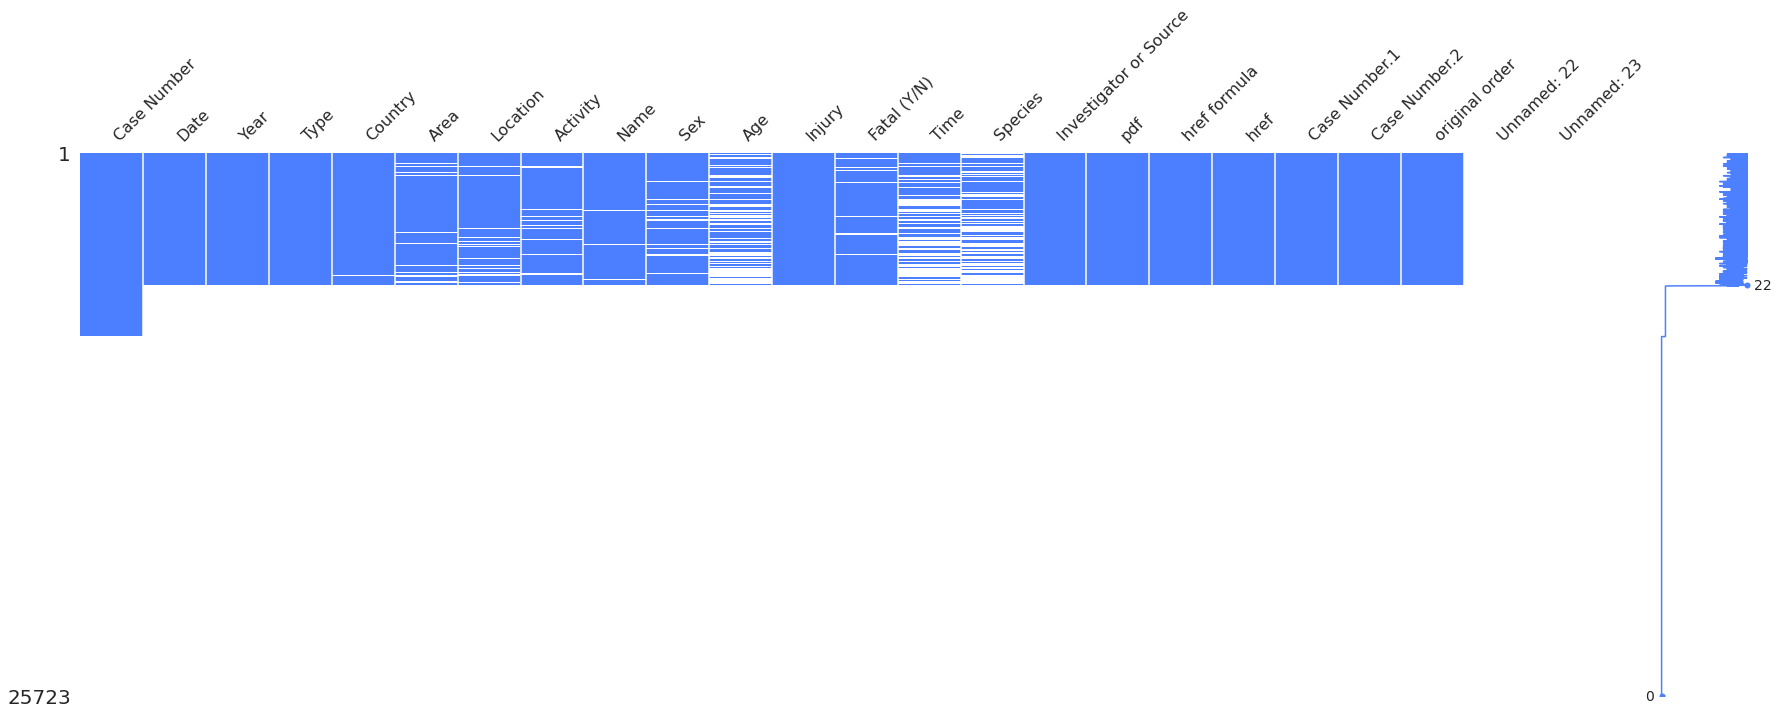

In [7]:
msno.matrix(data, figsize = (30,10), color=(0.3, 0.5, 1.0))

<AxesSubplot:>

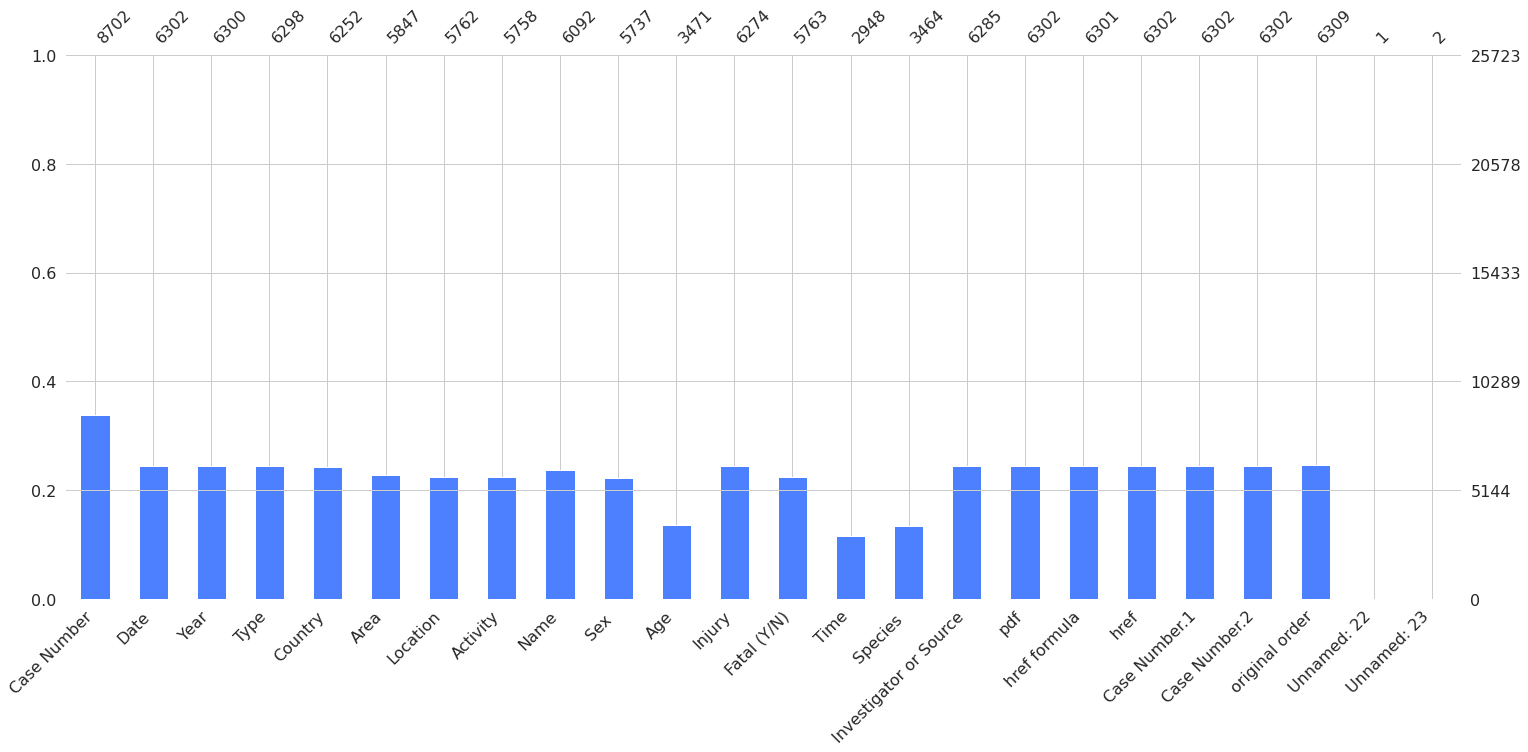

In [8]:
msno.bar(data, color=(0.3, 0.5, 1.0))

  Our dataframe is more than a 65 % empty
  
  I will drop the colunns I do not want to use and the row emptys or allmost emtpys

In [9]:
col_dro = ['Case Number', 'Year', 'Injury', 'Time', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23']
data = data.drop(col_dro, axis = 1)
data.sample(3)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Species,Investigator or Source
8850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3471,Jun-1968,Unprovoked,ENGLAND,NaN,NaN,NaN,Roy Cloke,M,NaN,N,Blue shark,"H.D. Baldridge (1994), SAF Case #1515"
6925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dates = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst=True)
data['Date']=dates 
data.sample(3)

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Species,Investigator or Source
18007,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2721,1988-07-23,Unprovoked,BAHAMAS,NaN,NaN,Free diving & spearfishing,Kenny Isham,M,NaN,N,2 m to 2.5 m shark,"E. Pace, FSAF"
16284,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.isna().sum()

Date                      20265
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Fatal (Y/N)               19960
Species                   22259
Investigator or Source    19438
dtype: int64

In [12]:
data.dropna(axis=0, how='all',thresh=2, inplace = True)

In [13]:
data

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Species,Investigator or Source
0,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,N,White shark,"R. Collier, GSAF"
1,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,N,NaN,"K.McMurray, TrackingSharks.com"
2,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,N,NaN,"K.McMurray, TrackingSharks.com"
3,2018-06-08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,N,2 m shark,"B. Myatt, GSAF"
4,2018-06-04,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,N,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...
6297,NaT,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,NaT,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,NaT,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,NaT,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,Y,NaN,"The Sun, 10/20/1938"


In [14]:
data.isna().sum()

Date                       844
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Fatal (Y/N)                539
Species                   2838
Investigator or Source      17
dtype: int64

<AxesSubplot:>

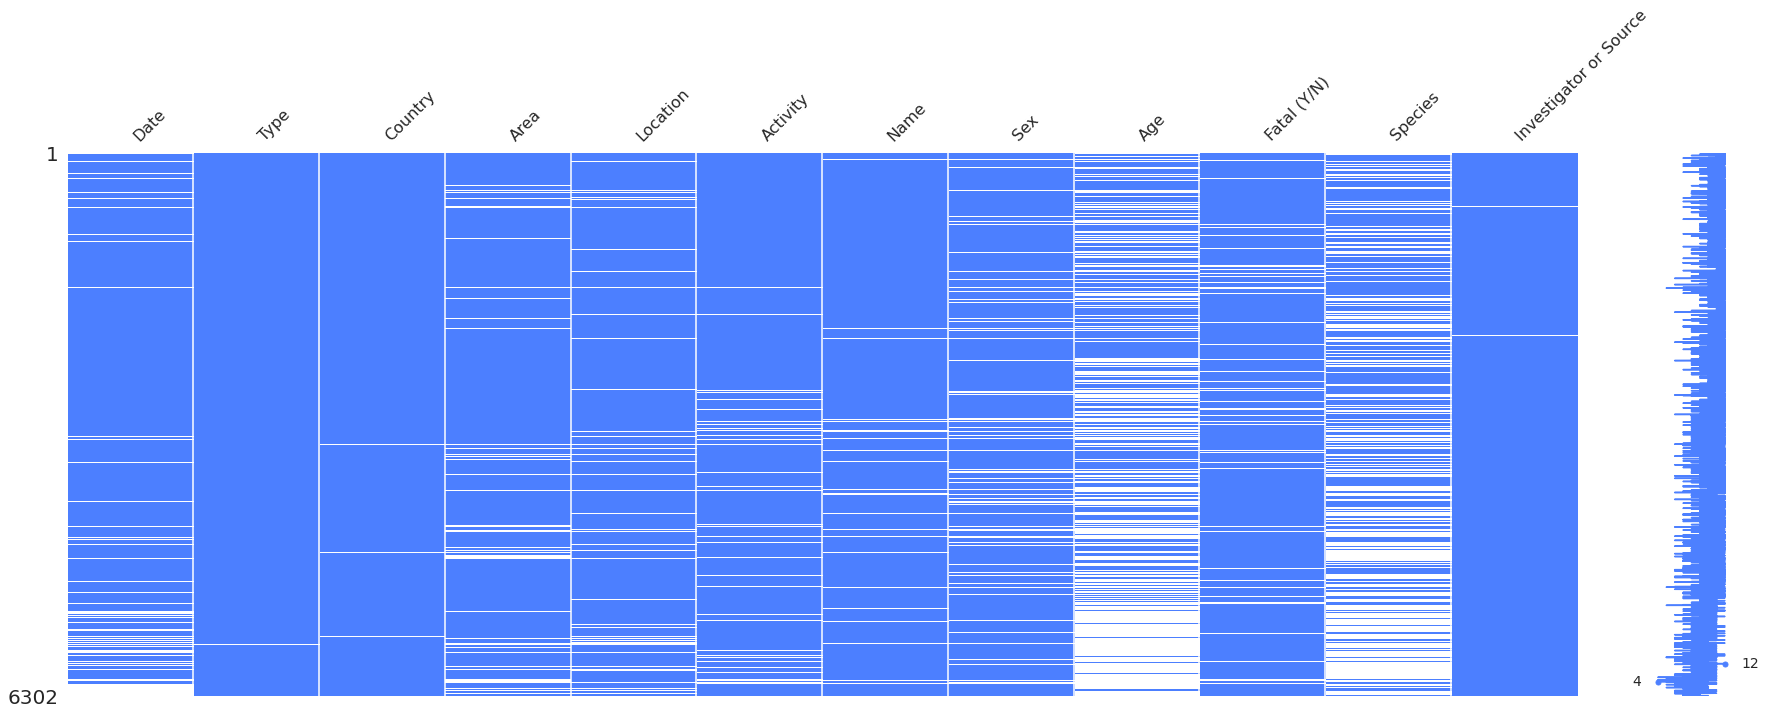

In [15]:
msno.matrix(data, figsize = (30,10), color=(0.3, 0.5, 1.0))

This start to look better

In [16]:
col_names = list(data.columns)
col_dic = {'Sex ':'Sex', 'Fatal (Y/N)': 'Fatal', 'Species ' : 'Species', 'Investigator or Source': 'Source'}
data.rename(columns=col_dic, copy=False, inplace = True)
data


,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal,Species,Source
0,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,N,White shark,"R. Collier, GSAF"
1,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,N,NaN,"K.McMurray, TrackingSharks.com"
2,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,N,NaN,"K.McMurray, TrackingSharks.com"
3,2018-06-08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,N,2 m shark,"B. Myatt, GSAF"
4,2018-06-04,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,N,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...
6297,NaT,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,NaT,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,NaT,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,NaT,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,Y,NaN,"The Sun, 10/20/1938"


## I want to see a ditribution of the incidents by age

I create a copy of the original dataframe and drop de na.

In [17]:
data_age = data[data['Age'].notna()]
data_age.Age.unique

<bound method Series.unique of 0             57
1             11
2             48
6             18
7             52
          ...   
6243          16
6254          50
6265    13 or 14
6276          16
6301          15
Name: Age, Length: 3471, dtype: object>

I got a problem with the dtype: object and some values are not just digits... this methot shows a warning, but performs well enoght to have a look of a ditribution, I am not chasing precision here.

In [18]:
data_age['Age'] = np.where(pd.to_numeric(data_age['Age'], 'coerce').notnull(), data_age['Age'], np.nan)
data_age= data_age[['Age']].dropna()
data_age = data_age.astype(int)
data_age.sample(10)

/tmp/ipykernel_7453/2571205778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['Age'] = np.where(pd.to_numeric(data_age['Age'], 'coerce').notnull(), data_age['Age'], np.nan)


,Age
141,73
3215,24
1827,35
4502,21
3896,19
1693,29
3547,13
4269,14
6061,15
858,29


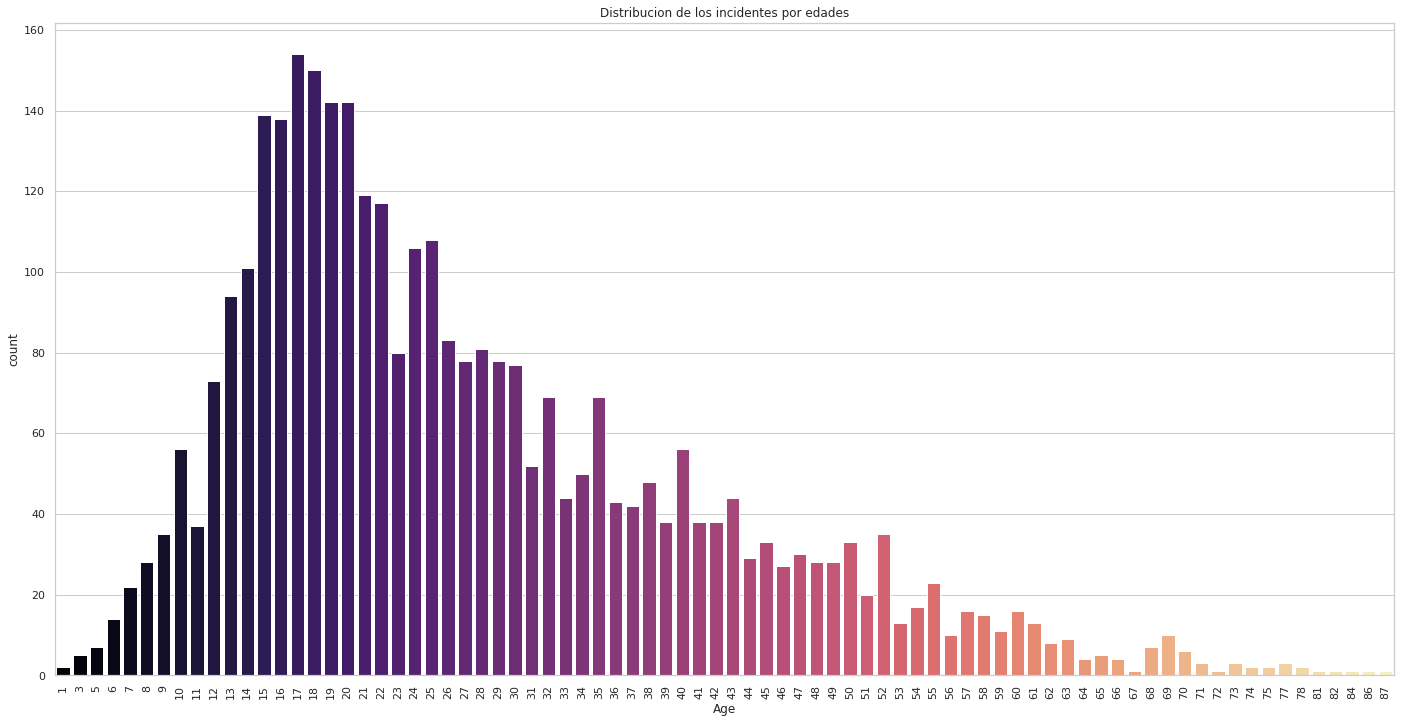

In [19]:
sns.countplot(x="Age", data=data_age, palette="magma");
plt.xticks(rotation=90)
plt.title('Distribucion de los incidentes por edades')
plt.show()

In [20]:
data.columns

Index(['Date', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex', 'Age', 'Fatal', 'Species', 'Source'],
      dtype='object')

That graf shows us that youth and incidents goes together, nothing that we could not imagine at first.

I am  not interested in age, area, Location, Name, Sex, Species so I drop them from my data

In [21]:
col_dro2 = ['Area', 'Location', 'Name', 'Sex','Species', 'Age']
data = data.drop(col_dro2, axis = 1)
data.sample(3)

,Date,Type,Country,Activity,Fatal,Source
623,2013-09-12,Unprovoked,USA,Surfing,N,"Orlando Sentinel, 9/7/2013"
2914,1983-12-07,Invalid,SOUTH AFRICA,NaN,NaN,"R.B. Wilson , G. Cliff, B. Davis & G. Charter,..."
3052,1980-11-17,Invalid,SOUTH AFRICA,Swimming,NaN,"W.O. Hutt; G. Charter, B. Davis, Natal Sharks..."


<AxesSubplot:>

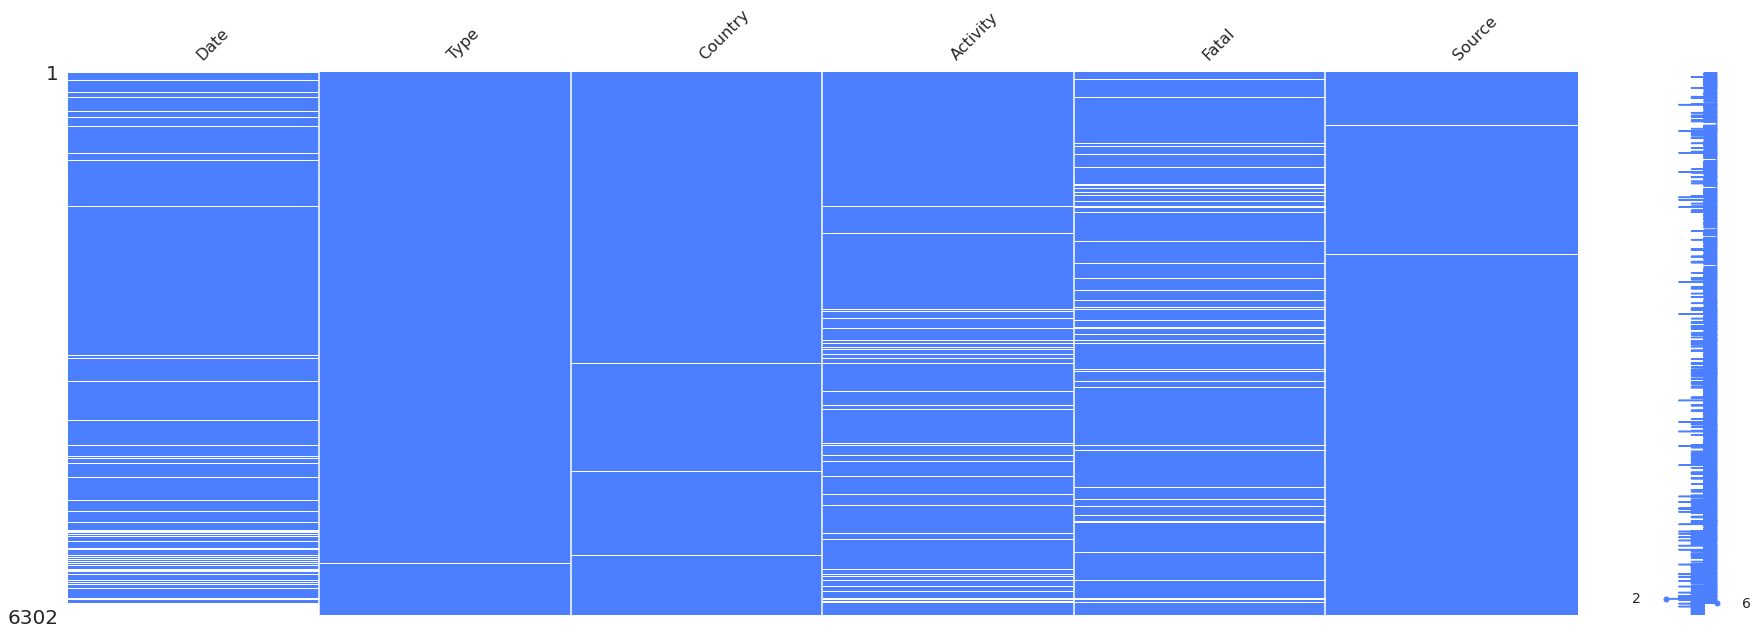

In [22]:
msno.matrix(data, figsize = (30,10), color=(0.3, 0.5, 1.0))

In [24]:
data.isna().sum()

Date        844
Type          4
Country      50
Activity    544
Fatal       539
Source       17
dtype: int64

In [37]:
print(data.Date.min(), data.Date.max())

AttributeError: 'Series' object has no attribute 'year'

In [33]:
data.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

# My hipotesys is that shark attaks happend because the human invasion of the animal ecosistem
